In [1]:
###############################################################################
# CS 155 HW 4 Problem 2 Sample Code
# Suraj Nair

# This sample code is meant as a guide on how to use keras
# and how to use the relevant model layers. This not a guide on
# how to design a network and the network in this example is 
# intentionally designed to have poor performace.
###############################################################################

import numpy as np 
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
#from sklearn import tree
#from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#from IPython.display import HTML
#from boosting_helper import (
#    generate_dataset,
#    visualize_dataset,
#    gb_suite, ab_suite,
#    visualize_loss_curves_gb, visualize_loss_curves_ab,
#    animate_gb, animate_ab
#)

Using TensorFlow backend.


In [23]:
## Importing the MNIST dataset using Keras
train = np.loadtxt("data/training_data.txt",skiprows = 1)
test = np.loadtxt("data/test_data.txt",skiprows = 1)
X_train = train[:15000,1:]/22
y_train = train[:15000,0]
X_test = train[15000:,1:]/22
y_test = train[15000:,0]
inds = np.permutation(len(y_train))
X_train = X_train[inds]
y_train = y_train[inds]

AttributeError: module 'numpy' has no attribute 'permutation'

In [25]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15000, 1000) (15000,) (5000, 1000) (5000,)


In [24]:
print(y_train)

[ 1.  1.  1. ...,  0.  0.  1.]


In [28]:
## Visualizing an image (optional)
import matplotlib.pyplot as plt
#plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
#plt.show()

## In your homework you should transform each input data point
## into a single vector here and should transform the 
## labels into a one hot vector using np_utils.to_categorical

## Also if you choose to do any data normalization (recommended)
## you should do it here

## Create your own model here given the constraints in the problem
model = Sequential()
#model.add(Flatten(input_shape=(28,28,)))  # Use np.reshape instead of this in hw
model.add(Dense(100, input_shape = (1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
"""model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.1))"""
#model.add(Dropout(0.4))
## Once you one-hot encode the data labels, the line below should be predicting probabilities of each of the 10 classes
## e.g. it should read: model.add(Dense(10)), not model.add(Dense(1))
model.add(Dense(1))
model.add(Activation('softmax'))




## Printing a summary of the layers and weights in your model
model.summary()

## In the line below we have specified the loss function as 'mse' (Mean Squared Error) because in the above code we did not one-hot encode the labels.
## In your implementation, since you are one-hot encoding the labels, you should use 'categorical_crossentropy' as your loss.
## You will likely have the best results with RMS prop or Adam as your optimizer.  In the line below we use Adadelta
Adam_lr = keras.optimizers.Adam(lr = 0.00001)
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='mse',optimizer=Adam_lr, metrics=['accuracy'])

fit = model.fit(X_train, y_train, batch_size=100, nb_epoch=10,
    verbose=1)

## Printing the accuracy of our model, according to the loss function specified in model.compile above
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               100100    
_________________________________________________________________
activation_33 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_34 (Activation)   (None, 1)                 0         
Total params: 100,201
Trainable params: 100,201
Non-trainable params: 0
_________________________________________________________________


/Users/cbochenek/anaconda/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
15000/15000 [==============================] - 3s 186us/step - loss: 0.4941 - acc: 0.5059
Epoch 2/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.4941 - acc: 0.5059
Epoch 3/10
13300/15000 [=========================>....] - ETA: 0s - loss: 0.4935 - acc: 0.5065

KeyboardInterrupt: 

In [ ]:
plt.imshow(X_train[5])

In [ ]:
print(keras.utils.np_utils.to_categorical(y_train))

In [10]:
## Visualizing an image (optional)
import matplotlib.pyplot as plt
#plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
#plt.show()

## In your homework you should transform each input data point
## into a single vector here and should transform the 
## labels into a one hot vector using np_utils.to_categorical

## Also if you choose to do any data normalization (recommended)
## you should do it here

## Create your own model here given the constraints in the problem
model = Sequential()
#model.add(Flatten(input_shape=(28,28,)))  # Use np.reshape instead of this in hw
model.add(Dense(150, input_shape = (1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
"""model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.1))"""
#model.add(Dropout(0.4))
## Once you one-hot encode the data labels, the line below should be predicting probabilities of each of the 10 classes
## e.g. it should read: model.add(Dense(10)), not model.add(Dense(1))
model.add(Dense(1))
model.add(Activation('softmax'))




## Printing a summary of the layers and weights in your model
model.summary()

## In the line below we have specified the loss function as 'mse' (Mean Squared Error) because in the above code we did not one-hot encode the labels.
## In your implementation, since you are one-hot encoding the labels, you should use 'categorical_crossentropy' as your loss.
## You will likely have the best results with RMS prop or Adam as your optimizer.  In the line below we use Adadelta
model.compile(loss='hinge',optimizer='Adam', metrics=['accuracy'])

fit = model.fit(X_train, y_train, batch_size=200, nb_epoch=20,
    verbose=1)

## Printing the accuracy of our model, according to the loss function specified in model.compile above
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               150150    
_________________________________________________________________
activation_20 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                7550      
_________________________________________________________________
activation_21 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_22 (Activation)   (None, 1)                 0         
Total para

/Users/cbochenek/anaconda/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
20000/20000 [==============================] - 3s 142us/step - loss: 0.9933 - acc: 0.0064
Epoch 2/20
20000/20000 [==============================] - 2s 98us/step - loss: 0.9933 - acc: 0.0064
Epoch 3/20
20000/20000 [==============================] - 2s 106us/step - loss: 0.9933 - acc: 0.0064
Epoch 4/20
20000/20000 [==============================] - 2s 93us/step - loss: 0.9933 - acc: 0.0064
Epoch 5/20
20000/20000 [==============================] - 2s 96us/step - loss: 0.9933 - acc: 0.0064
Epoch 6/20
20000/20000 [==============================] - 2s 105us/step - loss: 0.9933 - acc: 0.0064
Epoch 7/20
20000/20000 [==============================] - 2s 90us/step - loss: 0.9933 - acc: 0.0064
Epoch 8/20
20000/20000 [==============================] - 2s 93us/step - loss: 0.9933 - acc: 0.0064
Epoch 9/20
20000/20000 [==============================] - 2s 110us/step - loss: 0.9933 - acc: 0.0064
Epoch 10/20
20000/20000 [==============================] - 2s 105us/step - loss: 0.9933 - acc: 0

ValueError: Error when checking input: expected dense_20_input to have shape (1000,) but got array with shape (999,)

In [36]:
## Visualizing an image (optional)
import matplotlib.pyplot as plt
#plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
#plt.show()

## In your homework you should transform each input data point
## into a single vector here and should transform the 
## labels into a one hot vector using np_utils.to_categorical

## Also if you choose to do any data normalization (recommended)
## you should do it here

## Create your own model here given the constraints in the problem
model = Sequential()
#model.add(Flatten(input_shape=(28,28,)))  # Use np.reshape instead of this in hw
model.add(Dense(850, input_shape = (1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
"""model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.1))"""
#model.add(Dropout(0.4))
## Once you one-hot encode the data labels, the line below should be predicting probabilities of each of the 10 classes
## e.g. it should read: model.add(Dense(10)), not model.add(Dense(1))
model.add(Dense(1))
model.add(Activation('softmax'))




## Printing a summary of the layers and weights in your model
model.summary()

## In the line below we have specified the loss function as 'mse' (Mean Squared Error) because in the above code we did not one-hot encode the labels.
## In your implementation, since you are one-hot encoding the labels, you should use 'categorical_crossentropy' as your loss.
## You will likely have the best results with RMS prop or Adam as your optimizer.  In the line below we use Adadelta
model.compile(loss='hinge',optimizer='Adam', metrics=['accuracy'])

fit = model.fit(X_train, y_train, batch_size=200, nb_epoch=20,
    verbose=1)

## Printing the accuracy of our model, according to the loss function specified in model.compile above
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 850)               850850    
_________________________________________________________________
activation_11 (Activation)   (None, 850)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 850)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               85100     
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
__________

/Users/cbochenek/anaconda/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
15000/15000 [==============================] - 5s 352us/step - loss: 0.2357 - acc: 0.3331
Epoch 2/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.2357 - acc: 0.3331
Epoch 3/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.2357 - acc: 0.3331
Epoch 4/20
15000/15000 [==============================] - 4s 261us/step - loss: 0.2357 - acc: 0.3331
Epoch 5/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.2357 - acc: 0.3331
Epoch 6/20
15000/15000 [==============================] - 5s 306us/step - loss: 0.2357 - acc: 0.3331
Epoch 7/20
15000/15000 [==============================] - 6s 381us/step - loss: 0.2357 - acc: 0.3331
Epoch 8/20
15000/15000 [==============================] - 4s 293us/step - loss: 0.2357 - acc: 0.3331
Epoch 9/20
15000/15000 [==============================] - 5s 340us/step - loss: 0.2357 - acc: 0.3331
Epoch 10/20
15000/15000 [==============================] - 6s 367us/step - loss: 0.2357 - a

In [7]:
def classification_err(y, real_y):
    """
    This function returns the classification error between two equally-sized vectors of 
    labels; this is the fraction of samples for which the labels differ.
    
    Inputs:
        y: (N, ) shaped array of predicted labels
        real_y: (N, ) shaped array of true labels
    Output:
        Scalar classification error
    """
    #==============================================
    # TODO: Implement the classification_err function,
    # based on the above instructions.
    #==============================================    
    misclassified = np.where(y != real_y)[0]
    err = len(misclassified)/float(len(y))
    return err

def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    maximum tree depth parameters in the vector max_depth, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        max_depth: a (T, ) vector of all the max_depth stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    #================================================================
    # TODO: Implement the eval_tree_based_model_max_depth function,
    # based on the above instructions.
    #================================================================ 
    train_err = []
    test_err = []
    for i in range(len(max_depth)):
        print(i)
        clf.set_params(max_depth = max_depth[i])
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)
        train_err_single = classification_err(pred_train,y_train)
        test_err_single = classification_err(pred_test,y_test)
        train_err.append(train_err_single)
        test_err.append(test_err_single)
    return train_err, test_err, clf

In [38]:
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 52)

train_err, test_err, model = eval_tree_based_model_max_depth(clf, max_depth, X_train, 
                                                        y_train, X_test, y_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [63]:
predictions = model.predict(test)
ids = np.array(range(10000))+1
predictions = np.vstack((ids,predictions)).T

In [66]:
print(np.where(predictions[:,1] == 1))
#np.savetxt("RFC_20.csv", predictions, delimiter=",",fmt = "%i")

(array([], dtype=int64),)


In [ ]:
test_err = np.array(test_err)
train_err = np.array(train_err)
test_err_52_71 = np.copy(test_err)
train_err_52_71 = np.copy(train_err)

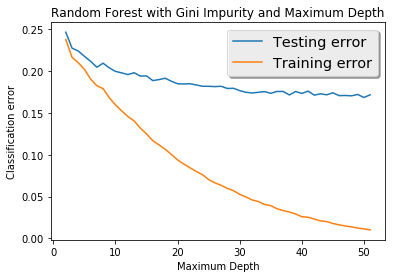

Test error minimized at max_depth = 50


In [39]:
#train_err_32_52 = np.array(train_err_32_52)
#test_err_32_52 = np.array(test_err_32_52)
#train_err_12_32 = np.array(train_err_12_32)
#test_err_12_32 = np.array(test_err_12_32)
plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Depth')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

In [42]:
X_train = train[:,1:]
y_train = train[:,0]

In [43]:
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(50, 51)

train_err, test_err, model = eval_tree_based_model_max_depth(clf, max_depth, X_train, 
                                                        y_train, X_test, y_test)

0


In [44]:
predictions = model.predict(test)
ids = np.array(range(10000))+1
predictions = np.vstack((ids,predictions)).T
np.savetxt("RFC_50.csv", predictions, delimiter=",",fmt = "%i")

In [47]:
class AdaBoost():
    def __init__(self, n_clfs=100):
        '''
        Initialize the AdaBoost model.

        Inputs:
            n_clfs (default 100): Initializer for self.n_clfs.        
                
        Attributes:
            self.n_clfs: The number of DT weak classifiers.
            self.coefs: A list of the AdaBoost coefficients.
            self.clfs: A list of the DT weak classifiers, initialized as empty.
        '''
        self.n_clfs = n_clfs
        self.coefs = []
        self.clfs = []

    def fit(self, X, Y, n_nodes=4):
        '''
        Fit the AdaBoost model. Note that since we are implementing this method in a class, rather
        than having a bunch of inputs and outputs, you will deal with the attributes of the class.
        (see the __init__() method).
        
        This method should thus train self.n_clfs DT weak classifiers and store them in self.clfs,
        with their coefficients in self.coefs.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.
            Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
               (Even though the labels are ints, we treat them as floats.)
            n_nodes: The max number of nodes that the DT weak classifiers are allowed to have.
            
        Outputs:
            A (N, T) shaped numpy array, where T is the number of iterations / DT weak classifiers,
            such that the t^th column contains D_{t+1} (the dataset weights at iteration t+1).
        '''
        #==============================================
        # TODO: implement the fit function.
        #==============================================   
        A = np.zeros((self.n_clfs,len(Y)))
        Ds = np.ones(len(Y))/float(len(Y))
        alpha = 1.
        for i in range(self.n_clfs):     
            tree = DecisionTreeClassifier(max_leaf_nodes = n_nodes)
            tree.fit(X,Y, Ds)
            self.clfs.append(tree)
            h = tree.predict(X)
            misclassified = np.where(h != Y)[0]
            loss = float(Ds[misclassified].sum())
            alpha = 0.5*np.log((1-loss)/loss)
            Ds = Ds*np.exp(-1*alpha*Y*h)
            Ds = Ds/np.sum(Ds)
            A[i] = Ds
            self.coefs.append(alpha)
        return A

    
    def predict(self, X):
        '''
        Predict on the given dataset.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.
            
        Outputs:
            A (N, ) shaped numpy array containing the (float) labels of the data points.
            (Even though the labels are ints, we treat them as floats.)
        '''
        # Initialize predictions.
        Y_pred = np.zeros(len(X))
        
        # Add predictions from each DT weak classifier.
        for i, clf in enumerate(self.clfs):
            Y_curr = self.coefs[i] * clf.predict(X)
            Y_pred += Y_curr

        # Return the sign of the predictions.
        return np.sign(Y_pred)

    def loss(self, X, Y):
        '''
        Calculate the classification loss.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.
            Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
               (Even though the labels are ints, we treat them as floats.)
            
        Outputs:
            The classification loss.
        '''
        # Calculate the points where the predictions and the ground truths don't match.
        Y_pred = self.predict(X)
        misclassified = np.where(Y_pred != Y)[0]

        # Return the fraction of such points.
        return float(len(misclassified)) / len(X)

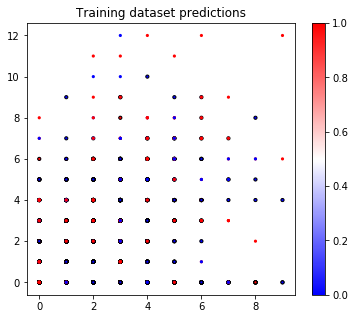

Training loss: 0.385667


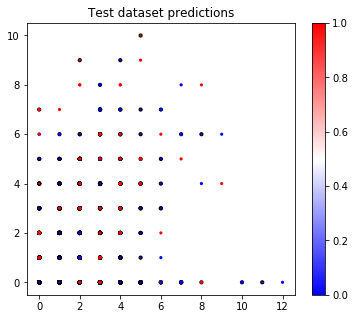

Test loss: 0.389800


In [48]:
model, D = ab_suite(AdaBoost, 500, X_train, y_train, X_test, y_test)

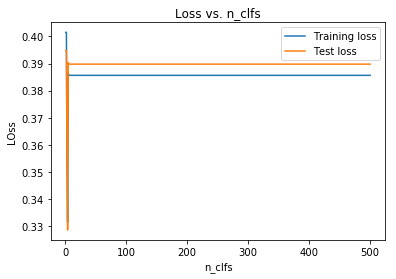

In [49]:
visualize_loss_curves_ab(model, X_train, y_train, X_test, y_test)

In [50]:
X_train = train[:,1:]
y_train = train[:,0]

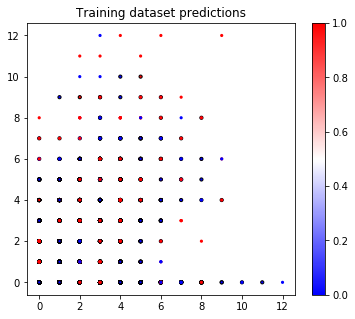

Training loss: 0.386700


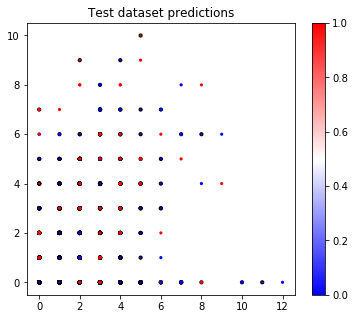

Test loss: 0.389800


In [51]:
model, D = ab_suite(AdaBoost, 500, X_train, y_train, X_test, y_test)

In [52]:
predictions = model.predict(test)
ids = np.array(range(10000))+1
predictions = np.vstack((ids,predictions)).T
np.savetxt("AdaBoost.csv", predictions, delimiter=",",fmt = "%i")

(array([ 59, 105, 359, 386, 929, 958]),)


In [73]:
np.savetxt("AdaBoost.csv", predictions, delimiter=",",fmt = "%i")

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

In [80]:
logistic = LogisticRegression(C = 1)

logistic.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
test_preds = logistic.predict(X_test)

In [82]:
len(np.where(test_preds == y_test)[0])/len(y_test)

0.8464

In [69]:
predictions = logistic.predict(test)

In [70]:
ids = np.array(range(10000))+1
predictions = np.vstack((ids,predictions)).T
np.savetxt("LogisticRegression.csv", predictions, delimiter=",",fmt = "%i")

In [61]:
class GradientBoosting():
    def __init__(self, n_clfs=100):
        '''
        Initialize the gradient boosting model.

        Inputs:
            n_clfs (default 100): Initializer for self.n_clfs.        
                
        Attributes:
            self.n_clfs: The number of DT weak regressors.
            self.clfs: A list of the DT weak regressors, initialized as empty.
        '''
        self.n_clfs = n_clfs
        self.clfs = []
        
    def fit(self, X, Y, n_nodes=4):
        '''
        Fit the gradient boosting model. Note that since we are implementing this method in a class,
        rather than having a bunch of inputs and outputs, you will deal with the attributes of the class.
        (see the __init__() method).
        
        This method should thus train self.n_clfs DT weak regressors and store them in self.clfs.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.
            Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
               (Even though the labels are ints, we treat them as floats.)
            n_nodes: The max number of nodes that the DT weak regressors are allowed to have.
        '''
        #==============================================
        # TODO: implement the fit function.
        #==============================================
        h_sum = np.zeros(len(Y))
        for i in range(self.n_clfs):     
            tree = DecisionTreeRegressor(max_leaf_nodes = n_nodes)
            boost_Y = Y - h_sum
            tree.fit(X,boost_Y)
            self.clfs.append(tree)
            h = tree.predict(X)
            h_sum += h
        return self

    def predict(self, X):
        '''
        Predict on the given dataset.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.

        Outputs:
            A (N, ) shaped numpy array containing the (float) labels of the data points.
            (Even though the labels are ints, we treat them as floats.)
        '''
        # Initialize predictions.
        Y_pred = np.zeros(len(X))
        
        # Add predictions from each DT weak regressor.
        for clf in self.clfs:
            Y_curr = clf.predict(X)
            Y_pred += Y_curr

        # Return the sign of the predictions.
        return np.sign(Y_pred)

    def loss(self, X, Y):
        '''
        Calculate the classification loss.

        Inputs:
            X: A (N, D) shaped numpy array containing the data points.
            Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
               (Even though the labels are ints, we treat them as floats.)
            
        Outputs:
            The classification loss.
        '''
        # Calculate the points where the predictions and the ground truths don't match.
        Y_pred = self.predict(X)
        misclassified = np.where(Y_pred != Y)[0]

        # Return the fraction of such points.
        return float(len(misclassified)) / len(X)

In [62]:
X_train = train[:15000,1:]
y_train = train[:15000,0]
X_test = train[15000:,1:]
y_test = train[15000:,0]

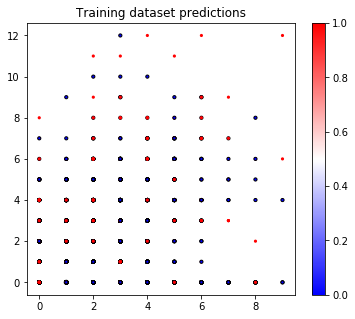

Training loss: 0.494200


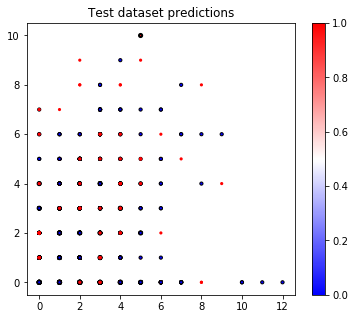

Test loss: 0.504000


In [63]:
model_gb = gb_suite(GradientBoosting, 500, X_train, y_train, X_test, y_test)

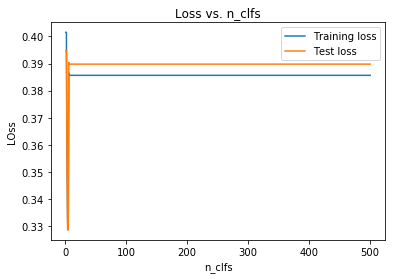

In [64]:
visualize_loss_curves_gb(model, X_train, y_train, X_test, y_test)

In [ ]:
X_train = train[:,1:]
y_train = train[:,0]

In [65]:
model_gb = gb_suite(GradientBoosting, 500, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

In [ ]:
prediction = model_gb.predict(test)

In [ ]:
ids = np.array(range(10000))+1
predictions = np.vstack((ids,prediction)).T
np.savetxt("GradientBoosting.csv", predictions, delimiter=",",fmt = "%i")

In [30]:
inds = np.where(y_train == 1)[0]
negative = X_train[inds]
mean_neg = negative.mean(axis=0)
max_ind_neg = np.where(mean_neg == mean_neg.max())
print(mean_neg.max())
inds_pos = np.where(y_train == 0)[0]
positive = X_train[inds_pos]
mean_pos = positive.mean(axis=0)
print(mean_pos[max_ind_neg])

1.91397849462
[ 1.53096692]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier


In [91]:
max_depths = [12,13,14,15,16,17,18]
accs = []
for md in max_depths:
    print(md)
    clf = GradientBoostingClassifier(loss = 'exponential' ,n_estimators = 100,max_depth = md)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accs.append(acc)

12
13
14
15


KeyboardInterrupt: 

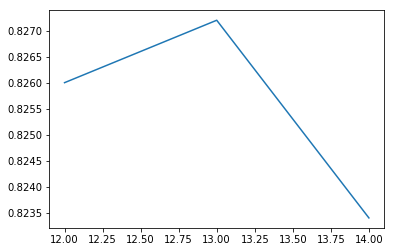

In [92]:
plt.plot(max_depths[:3],accs)
plt.show()

In [96]:
import sklearn
KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 10)
KNN.fit(X_train,y_train)
print(KNN.score(X_test,y_test))

0.6636
